In [3]:
import nltk
import re

In [4]:
word = 'supercalifragilisticexpialidocious'
result = re.findall('[aeiou]', word)
print(result)
result = re.findall('[aeiou](..)[aeiou]', word)
print(result)
result = re.findall('[^aeiou].+[^aeiou]', word) # greedy search 
#. 하고 찾는 것은 한자리를 차지하는게 하나만 나오면 된다. 가능한 크게 찾는다. 앞에꺼랑 합쳐서 찾아진다. 모음이 아닌것, 하나이상의 캐릭터, 그리고 또 모음이 아닌것
print(result)
result = re.findall('[^aeiou].+?[^aeiou]', word) # reluctant search .+?로 들어가면 있거나 없거나. 물음표가 잇으면 가능한 좁게 찾으라는 뜻
print(result)

['u', 'e', 'a', 'i', 'a', 'i', 'i', 'i', 'e', 'i', 'a', 'i', 'o', 'i', 'o', 'u']
['rc', 'fr', 'st', 'xp', 'ci']
['supercalifragilisticexpialidocious']
['sup', 'rcal', 'frag', 'lis', 'tic', 'xpial', 'doc']


In [5]:
wsj = sorted(set(nltk.corpus.treebank.words()))
print(wsj)

['!', '#', '$', '%', '&', "'", "''", "'30s", "'40s", "'50s", "'80s", "'82", "'86", "'S", "'d", "'ll", "'m", "'re", "'s", "'ve", '*', '*-1', '*-10', '*-100', '*-101', '*-102', '*-103', '*-104', '*-105', '*-106', '*-107', '*-108', '*-109', '*-11', '*-110', '*-111', '*-112', '*-113', '*-114', '*-115', '*-116', '*-117', '*-118', '*-119', '*-12', '*-120', '*-121', '*-122', '*-123', '*-124', '*-125', '*-126', '*-127', '*-128', '*-129', '*-13', '*-130', '*-131', '*-132', '*-133', '*-134', '*-135', '*-136', '*-137', '*-138', '*-139', '*-14', '*-140', '*-141', '*-142', '*-144', '*-145', '*-146', '*-147', '*-149', '*-15', '*-150', '*-151', '*-152', '*-153', '*-154', '*-155', '*-156', '*-157', '*-158', '*-159', '*-16', '*-160', '*-161', '*-162', '*-163', '*-164', '*-165', '*-166', '*-17', '*-18', '*-19', '*-2', '*-20', '*-21', '*-22', '*-23', '*-24', '*-25', '*-26', '*-27', '*-28', '*-29', '*-3', '*-30', '*-31', '*-32', '*-33', '*-34', '*-35', '*-36', '*-37', '*-38', '*-39', '*-4', '*-40', '*-41'

set은 집합으로 만들고 sorting을 한다. 사전화 한다. 

In [14]:
wordlist = [vs for word in wsj for vs in re.findall('[aeiou]{2,}', word)]
print(wordlist)

['ea', 'oi', 'ea', 'ou', 'oi', 'ea', 'ea', 'oi', 'oi', 'ea', 'io', 'ea', 'ea', 'ea', 'oi', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'ee', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'ea', 'oi', 'ea', 'ea', 'ou', 'ou', 'ou', 'ie', 'ui', 'io', 'ua', 'io', 'ai', 'ai', 'ai', 'io', 'ie', 'ue', 'ue', 'ia', 'ie', 'ea', 'ai', 'ou', 'ia', 'ei', 'ie', 'ea', 'ea', 'ie', 'ia', 'ia', 'ua', 'ie', 'io', 'ea', 'ia', 'io', 'ui', 'ia', 'ia', 'ea', 'iai', 'ai', 'ia', 'ia', 'ia', 'ia', 'ia', 'io', 'oo', 'io', 'ia', 'ia', 'ia', 'ia', 'ue', 'ea', 'ai', 'ai', 'ue', 'ie', 'au', 'ea', 'ea', 'ea', 'ea', 'eau', 'au', 'ei', 'ei', 'ei', 'ei', 'ei', 'ia', 'ie', 'io', 'ue', 'oa', 'oei', 'oe', 'ia', 'oo', 'oo', 'oo', 'eau', 'ou', 'ou', 'ai', 'ou', 'ai', 'oo', 'ea', 'au', 'ia', 'ea', 'ea', 'ee', 'ia', 'ai', 'oa', 'oo', 'oo', 'oo', 'ei', 'ei', 'ea', 'ui', 'ui', 'eau', 'ie', 'ia', 'ia', 'ai', 'eau', 'ia', 'ea', 'ie', 'ie', 'oo', 'ai', 'ai', 'io', 'ie', 'ie', 'eau', 'ee', 'ee', 'ea', 'io', 'oo', 'ia', 'ie', 'ui', 'io', 'i

word에서 findall 하는데, aeiou 모음이 두번이상 발견되면 그 모든 string을 찾고 vs에 넣은 뒤 재배열해라 

In [13]:
fdist = nltk.FreqDist(wordlist)
fdist.most_common(10)

[('io', 549),
 ('ea', 476),
 ('ie', 331),
 ('ou', 329),
 ('ai', 261),
 ('ia', 253),
 ('ee', 217),
 ('oo', 174),
 ('ua', 109),
 ('au', 106)]

어떤 모음이 제일 많이 나오는가? 만약에 영어사전 같은 것을 wordlist을 넣으면, 그 빈도수는 모두 1일 것이다. 

In [7]:
english_udhr = nltk.corpus.udhr.words('English-Latin1')
print(english_udhr)

['Universal', 'Declaration', 'of', 'Human', 'Rights', ...]


In [8]:
regexp = '^[AEIOUaeiou]+|[AEIOUaeiou]+$|[^AEIOUaeiou]'
def compress(word):
    pieces = re.findall(regexp, word)
    return ''.join(pieces)
[compress(w) for w in english_udhr[:75]]

['Unvrsl',
 'Dclrtn',
 'of',
 'Hmn',
 'Rghts',
 'Prmble',
 'Whrs',
 'rcgntn',
 'of',
 'the',
 'inhrnt',
 'dgnty',
 'and',
 'of',
 'the',
 'eql',
 'and',
 'inlnble',
 'rghts',
 'of',
 'all',
 'mmbrs',
 'of',
 'the',
 'hmn',
 'fmly',
 'is',
 'the',
 'fndtn',
 'of',
 'frdm',
 ',',
 'jstce',
 'and',
 'pce',
 'in',
 'the',
 'wrld',
 ',',
 'Whrs',
 'dsrgrd',
 'and',
 'cntmpt',
 'fr',
 'hmn',
 'rghts',
 'hve',
 'rsltd',
 'in',
 'brbrs',
 'acts',
 'whch',
 'hve',
 'outrgd',
 'the',
 'cnscnce',
 'of',
 'mnknd',
 ',',
 'and',
 'the',
 'advnt',
 'of',
 'a',
 'wrld',
 'in',
 'whch',
 'hmn',
 'bngs',
 'shll',
 'enjy',
 'frdm',
 'of',
 'spch',
 'and']

함수 만들기. def~return 까지가 함수. string을 regexp로 담은 것이고, 함수를 쓰는 방법은 함수 자체는 입력을 받아서 내부적으로 바꾸고 출력을 해주는 것. compress라는 명명이 되어 있음. ()를 열고, 그 괄호 속에 들어가는 것이 입력. def = define. 함수의 내용부분은 indent 가 필요함. compress 함수는 word라는 string을 받아서 바로 그자리에서 regexp를 때리고, return은 이 함수의 출력값. 입력은 word고 출력은 return 다음이 출력. 처음에는 모음으로 시작되는것이 하나 이상이 나오면 찾는데, 중간에 모음이 나오는 것이 있으면 찾아라, 마지막에는 자음인 것을 찾아라. 그것들을 pieces로 찾아서 합쳐라. 

In [9]:
rotokas_words = nltk.corpus.toolbox.words('rotokas.dic')
print(rotokas_words)

['kaa', 'kaa', 'kaa', 'kaakaaro', 'kaakaaviko', 'kaakaavo', 'kaakaoko', 'kaakasi', 'kaakau', 'kaakauko', 'kaakito', 'kaakuupato', 'kaaova', 'kaapa', 'kaapea', 'kaapie', 'kaapie', 'kaapiepato', 'kaapisi', 'kaapisivira', 'kaapo', 'kaapopato', 'kaara', 'kaare', 'kaareko', 'kaarekopie', 'kaareto', 'Kaareva', 'kaava', 'kaavaaua', 'kaaveaka', 'kaaveakapie', 'kaaveakapievira', 'kaaveakavira', 'kae', 'kae', 'kaekae', 'kaekae', 'kaekaearo', 'kaekaeo', 'kaekaesoto', 'kaekaevira', 'kaekeru', 'kaepaa', 'kaepie', 'kaepie', 'kaepievira', 'kaereasi', 'kaereasivira', 'kaetu', 'kaetupie', 'kaetuvira', 'kaeviro', 'kagave', 'kaie', 'kaiea', 'kaikaio', 'Kaio', 'kaipori', 'kaiporipie', 'kaiporivira', 'kairi', 'kairiro', 'kairo', 'kaita', 'kaitutu', 'kaitutupie', 'kaitutuvira', 'kakae', 'kakae', 'kakae', 'kakaevira', 'kakapikoa', 'kakapikoto', 'kakapu', 'kakapua', 'kakara', 'Kakarapaia', 'kakarau', 'Kakarera', 'kakata', 'kakate', 'kakatuara', 'kakau', 'kakauoa', 'kakavea', 'kakavoro', 'kakavu', 'kakeoto', '

In [10]:
cvs = [cv for w in rotokas_words for cv in re.findall('[ptksvr][aeiou]', w)]
print(cvs)

['ka', 'ka', 'ka', 'ka', 'ka', 'ro', 'ka', 'ka', 'vi', 'ko', 'ka', 'ka', 'vo', 'ka', 'ka', 'ko', 'ka', 'ka', 'si', 'ka', 'ka', 'ka', 'ka', 'ko', 'ka', 'ki', 'to', 'ka', 'ku', 'pa', 'to', 'ka', 'va', 'ka', 'pa', 'ka', 'pe', 'ka', 'pi', 'ka', 'pi', 'ka', 'pi', 'pa', 'to', 'ka', 'pi', 'si', 'ka', 'pi', 'si', 'vi', 'ra', 'ka', 'po', 'ka', 'po', 'pa', 'to', 'ka', 'ra', 'ka', 're', 'ka', 're', 'ko', 'ka', 're', 'ko', 'pi', 'ka', 're', 'to', 're', 'va', 'ka', 'va', 'ka', 'va', 'ka', 've', 'ka', 'ka', 've', 'ka', 'pi', 'ka', 've', 'ka', 'pi', 'vi', 'ra', 'ka', 've', 'ka', 'vi', 'ra', 'ka', 'ka', 'ka', 'ka', 'ka', 'ka', 'ka', 'ka', 'ro', 'ka', 'ka', 'ka', 'ka', 'so', 'to', 'ka', 'ka', 'vi', 'ra', 'ka', 'ke', 'ru', 'ka', 'pa', 'ka', 'pi', 'ka', 'pi', 'ka', 'pi', 'vi', 'ra', 'ka', 're', 'si', 'ka', 're', 'si', 'vi', 'ra', 'ka', 'tu', 'ka', 'tu', 'pi', 'ka', 'tu', 'vi', 'ra', 'ka', 'vi', 'ro', 'ka', 've', 'ka', 'ka', 'ka', 'ka', 'ka', 'po', 'ri', 'ka', 'po', 'ri', 'pi', 'ka', 'po', 'ri', 'vi', 'ra

In [11]:
cfd = nltk.ConditionalFreqDist(cvs) # CFD works pairwise only
cfd.tabulate()

    a   e   i   o   u 
k 418 148  94 420 173 
p  83  31 105  34  51 
r 187  63  84  89  79 
s   0   0 100   2   1 
t  47   8   0 148  37 
v  93  27 105  48  49 


tabulate을 써버리면 나온 횟수를 차트로 만들어준다. Conditional 하게 만들어준다. 

In [15]:
import nltk
sent = "I am Jhon from America and would like to go to Starbuck"
token = nltk.word_tokenize(sent)
print(token)

['I', 'am', 'Jhon', 'from', 'America', 'and', 'would', 'like', 'to', 'go', 'to', 'Starbuck']


In [16]:
'''
POS tag list:

CC	coordinating conjunction
CD	cardinal digit
DT	determiner
EX	existential there (like: "there is" ... think of it like "there exists")
FW	foreign word
IN	preposition/subordinating conjunction
JJ	adjective	'big'
JJR	adjective, comparative	'bigger'
JJS	adjective, superlative	'biggest'
LS	list marker	1)
MD	modal	could, will
NN	noun, singular 'desk'
NNS	noun plural	'desks'
NNP	proper noun, singular	'Harrison'
NNPS	proper noun, plural	'Americans'
PDT	predeterminer	'all the kids'
POS	possessive ending	parent's
PRP	personal pronoun	I, he, she
PRP$	possessive pronoun	my, his, hers
RB	adverb	very, silently,
RBR	adverb, comparative	better
RBS	adverb, superlative	best
RP	particle	give up
TO	to	go 'to' the store.
UH	interjection	errrrrrrrm
VB	verb, base form	take
VBD	verb, past tense	took
VBG	verb, gerund/present participle	taking
VBN	verb, past participle	taken
VBP	verb, sing. present, non-3d	take
VBZ	verb, 3rd person sing. present	takes
WDT	wh-determiner	which
WP	wh-pronoun	who, what
WP$	possessive wh-pronoun	whose
WRB	wh-abverb	where, when
'''

'\nPOS tag list:\n\nCC\tcoordinating conjunction\nCD\tcardinal digit\nDT\tdeterminer\nEX\texistential there (like: "there is" ... think of it like "there exists")\nFW\tforeign word\nIN\tpreposition/subordinating conjunction\nJJ\tadjective\t\'big\'\nJJR\tadjective, comparative\t\'bigger\'\nJJS\tadjective, superlative\t\'biggest\'\nLS\tlist marker\t1)\nMD\tmodal\tcould, will\nNN\tnoun, singular \'desk\'\nNNS\tnoun plural\t\'desks\'\nNNP\tproper noun, singular\t\'Harrison\'\nNNPS\tproper noun, plural\t\'Americans\'\nPDT\tpredeterminer\t\'all the kids\'\nPOS\tpossessive ending\tparent\'s\nPRP\tpersonal pronoun\tI, he, she\nPRP$\tpossessive pronoun\tmy, his, hers\nRB\tadverb\tvery, silently,\nRBR\tadverb, comparative\tbetter\nRBS\tadverb, superlative\tbest\nRP\tparticle\tgive up\nTO\tto\tgo \'to\' the store.\nUH\tinterjection\terrrrrrrrm\nVB\tverb, base form\ttake\nVBD\tverb, past tense\ttook\nVBG\tverb, gerund/present participle\ttaking\nVBN\tverb, past participle\ttaken\nVBP\tverb, sing. 

In [21]:
pos = nltk.pos_tag(token)
print(pos)

[('I', 'PRP'), ('am', 'VBP'), ('Jhon', 'RB'), ('from', 'IN'), ('America', 'NNP'), ('and', 'CC'), ('would', 'MD'), ('like', 'VB'), ('to', 'TO'), ('go', 'VB'), ('to', 'TO'), ('Starbuck', 'NNP')]


pos = part of speech, theoretical, linguistic 한 syntax가 아니라 공학적접근. tuple을 쓰는 이유는 정보보호 차원에서. 

In [22]:
NE = nltk.ne_chunk(pos)
print(NE)
# common Entity types: ORGANIZATION, PERSON, LOCATION, DATE, TIME, MONEY, and GPE (geo-political entity)

(S
  I/PRP
  am/VBP
  Jhon/RB
  from/IN
  (GPE America/NNP)
  and/CC
  would/MD
  like/VB
  to/TO
  go/VB
  to/TO
  (PERSON Starbuck/NNP))


긴 문장이 있을때 필요한 정보만 빼내면 된다. named entity만 찾아내는 것이다. 과정이 생각보다 단순하다. Named entity 가 가장 중요한 text processing의 과정. 정보적으로 John, America, Starbuck 중요한거 같다. 여기서 뽑아내서 선택이 된다. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.empty([2,3], dtype='int')

array([[         0, 1072168960,          0],
       [1072168960,          0,          0]])

2x3 matrix를 만드는데 random 한 숫자들이 들어간다. []이 두개면 2차원이라고 생각하면 됨. []이 하나면 그냥 vector

In [4]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [5]:
np.arange(0,10,2, dtype='float64')

array([0., 2., 4., 6., 8.])

0부터 10까지 2만큼 늘어나면서 가라. 앞에있는 0은 포함하고 10은 포함하면 안된다. 숫자뒤에 .이 있는데 이건 data type을 float로 했기 때문에. float 64는 float인데 소수점을 더 뒤에까지 나타내라는 것. 

In [6]:
np.linspace(0,10,6, dtype='float')

array([ 0.,  2.,  4.,  6.,  8., 10.])

0 부터 10까지 총 6구간을 만들어라. 

In [7]:
X = np.array([[1,2,3], [4,5,6]])
X

array([[1, 2, 3],
       [4, 5, 6]])

list형태를 만들어서 그걸 밑으로 내려가서 list에서 array로 바꿔주는 작업. 

In [8]:
X.astype(np.float64)

array([[1., 2., 3.],
       [4., 5., 6.]])

X의 type을 바꾸고 싶을때 X.astype을 통해서 int를 float로 바꿔줄 수 있다. 

In [9]:
np.zeros_like(X)

array([[0, 0, 0],
       [0, 0, 0]])

X의 array를 zeros 화 해주는 것. 

[ 0.30907436  1.53625469  0.75024399  0.11394726  0.99836307  0.70857422
  2.0529924   0.04460159 -0.61589646 -1.72580508  1.46978203  0.41548415
 -0.56211154  1.40025987  0.51880263  1.44789874  1.20420349 -0.37072526
  0.11955888 -0.5224486  -0.76249684 -0.27959489  1.90535388  0.91778961
  0.36587199  0.67517438  0.56963783 -0.72481485  0.70044954 -2.0573027
 -0.50945514 -0.24837154 -0.32178079  1.1320427  -1.01693089 -0.68118271
  0.1147756  -0.61917306  0.71736346 -0.36428463 -0.29974877  0.37795128
 -0.31460304  0.21281306 -1.38335031  0.56382394 -1.15174974  0.23576224
 -0.59943189 -0.79494381 -2.3216879  -0.57510977 -0.59765818 -0.10643511
  0.53832887 -0.91534711  1.09123191 -0.3386413   0.34001193 -1.20681075
  0.83634712 -0.54553446  0.07692639 -2.58232228 -0.48119014 -1.41054741
 -0.52974516  0.86147514 -1.51427715  0.32911474  0.98399227 -1.48276375
 -0.11128266 -0.01998205  1.09746452 -1.70161053  1.57279421  1.66047874
  0.58563225  0.37600673  0.24221057 -1.13912803 -0.

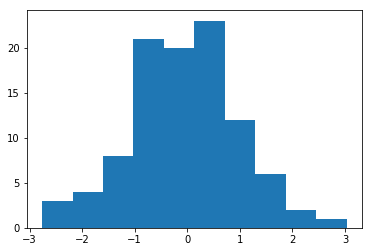

In [10]:
data = np.random.normal(0,1, 100)
print(data)
plt.hist(data, bins=10)
plt.show()

 0을 평균값으로 하고 1이 standard deviation. 정규분표표를 만들어라. 그래서 histogram을 뿌려봤더니 그림이 나오더라. 

In [11]:
X = np.ones([2, 3, 4])
X

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

[]이 3개이면 3차원이라고 생각하면됨. 크게 두덩어리니까 2차원, 3줄로 나뉘니까 3, 그리고 그속에 4개씩 들어있으니까 4. 덩어리나누고, 줄나누고 갯수들어간 순서. 

In [17]:
Y = X.reshape(-1, 3, 2)
Y

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

-1 이면 자동으로 그 차원을 계산해준다. 그니까 숫자 2개를 알고, 다른거 하나 뭐들어가야될지 모르면 -1을 쳐주면 된다. 

In [18]:
np.allclose(X.reshape(-1, 3, 2), Y)

True

In [19]:
assert np.allclose(X.reshape(-1, 3, 2), Y)

In [38]:
a = np.random.randint(0, 10, [2, 3])
b = np.random.random([2, 3])
np.savez("test", a, b)
a

array([[5, 6, 9],
       [4, 6, 5]])

0부터 9까지 integer를 만드는데, 2X3의 형태로 만들어라. b는 2X3를 만드는데 random한 숫자로 나오게 만들어라. 저장을 하고 싶을때, np.savez를 치고, 그 뒤는 파일이름. 그리고 a,b는 만들어준 변수. 

In [36]:
!ls -al test*

test파일을 찾는 명령어 

In [41]:
del a, b
%who  


X	 Y	 data	 np	 npzfiles	 plt	 


%who를 쓰면 여태까지 memory상에 있는 variable 들을 보여준다. 

In [28]:
npzfiles = np.load("test.npz")
npzfiles.files

['arr_0', 'arr_1']

지금 array 0과 1이 들어와 있는 상태이다. 

In [44]:
npzfiles['arr_0']

BadZipFile: Bad CRC-32 for file 'arr_0.npy'

In [48]:
data = np.loadtxt("regression.csv", delimiter=",", skiprows=1, dtype={'names':("X", "Y"), 'formats':('f', 'f')})
data

array([( 3.3  , 1.7  ), ( 4.4  , 2.76 ), ( 5.5  , 2.09 ), ( 6.71 , 3.19 ),
       ( 6.93 , 1.694), ( 4.168, 1.573), ( 9.779, 3.366), ( 6.182, 2.596),
       ( 7.59 , 2.53 ), ( 2.167, 1.221), ( 7.042, 2.827), (10.791, 3.465),
       ( 5.313, 1.65 ), ( 7.997, 2.904), ( 5.654, 2.42 ), ( 9.27 , 2.94 ),
       ( 3.1  , 1.3  )], dtype=[('X', '<f4'), ('Y', '<f4')])

format에 ff로 받으면 float로 받는다. 

In [ ]:
np.savetxt("regression_saved.csv", data, delimiter=",")
!ls -al regression_saved.cs

In [49]:
arr = np.random.random([5,2,3])

In [50]:
print(type(arr))
print(len(arr))
print(arr.shape)
print(arr.ndim)
print(arr.size)
print(arr.dtype)

<class 'numpy.ndarray'>
5
(5, 2, 3)
3
30
float64


In [57]:
a = np.arange(1, 5)
b = np.arange(9, 5, -1)
a,b

(array([1, 2, 3, 4]), array([9, 8, 7, 6]))

a,b한번에 쓰면 다 볼 수 있다. 

In [52]:
print(a - b)
print(a * b)

[-8 -6 -4 -2]
[ 9 16 21 24]


In [59]:
a = np.matrix(a)
b = np.matrix(b)
a,b

(matrix([[1, 2, 3, 4]]), matrix([[9, 8, 7, 6]]))

matrix로 바꿔주는 순간 axb의 형태가 나와야하므로 [][]가 더 들어가야한다. 

In [54]:
a * b.T

matrix([[70]])

In [55]:
a.T * b

matrix([[ 9,  8,  7,  6],
        [18, 16, 14, 12],
        [27, 24, 21, 18],
        [36, 32, 28, 24]])

In [60]:
a = np.arange(1, 10).reshape(3,3)
b = np.arange(9, 0, -1).reshape(3,3)
print(a)
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [61]:
a == b

array([[False, False, False],
       [False,  True, False],
       [False, False, False]])

In [62]:
a > b

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

In [63]:
a.sum(), np.sum(a)

(45, 45)

a의 모든 합을 구하라 

In [64]:
a.sum(axis=0), np.sum(a, axis=0)

(array([12, 15, 18]), array([12, 15, 18]))

3x3를 한쪽 방향으로 더할 수도 있을 것이다. 첫번째는 row방향으로 sum을 하라. row를 기반으로 해서 collapse 시킨다.

In [65]:
a.sum(axis=1), np.sum(a, axis=1)

(array([ 6, 15, 24]), array([ 6, 15, 24]))

axis=1이라고 하면 행방향으로 다 더한것. 

In [66]:
a = np.arange(1, 25).reshape(4, 6)
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [67]:
a + 100

array([[101, 102, 103, 104, 105, 106],
       [107, 108, 109, 110, 111, 112],
       [113, 114, 115, 116, 117, 118],
       [119, 120, 121, 122, 123, 124]])

In [68]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

In [69]:
a + b

array([[ 1,  3,  5,  7,  9, 11],
       [ 7,  9, 11, 13, 15, 17],
       [13, 15, 17, 19, 21, 23],
       [19, 21, 23, 25, 27, 29]])

그냥 a에다 b 더한것. 

In [70]:
c = np.arange(4).reshape([4,1])
c

array([[0],
       [1],
       [2],
       [3]])

In [71]:
a + c

array([[ 1,  2,  3,  4,  5,  6],
       [ 8,  9, 10, 11, 12, 13],
       [15, 16, 17, 18, 19, 20],
       [22, 23, 24, 25, 26, 27]])

c는 4x1이니까 그 방향으로 a에다 다 더한 것. 

In [73]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

In [74]:
# parameter setting
amp = 1          # range [0.0, 1.0]
sr = 10000       # sampling rate, Hz
dur = 0.5        # in seconds
freq = 100.0     # sine frequency, Hz

In [75]:
# generate time
t = np.arange(1, sr * dur+1)/sr

시간을 5000/10000까지 만든 것. 0.5초까지 시간을 만들어준 것이다. 

In [76]:
# generate phase
theta = t * 2*np.pi * freq

In [77]:
# generate signal by cosine-phasor
s = np.sin(theta)

<IPython.core.display.Javascript object>


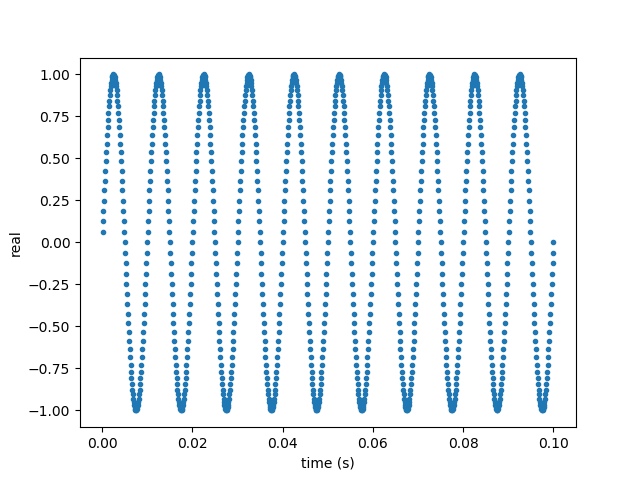

Text(0, 0.5, 'real')

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

In [81]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

<IPython.core.display.Javascript object>


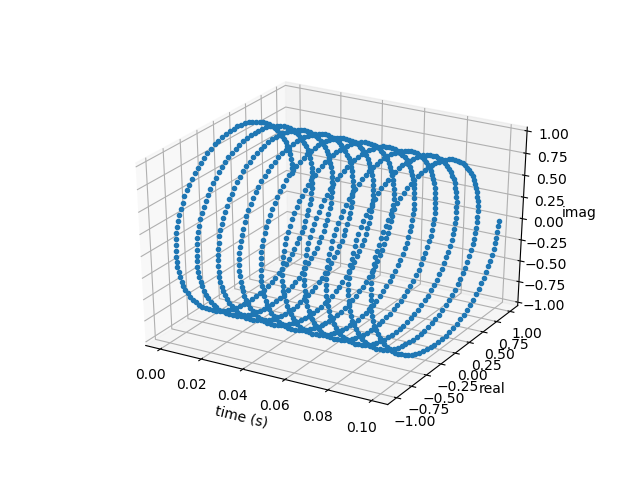

Text(0.5, 0, 'imag')

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
ipd.Audio(s, rate=sr)